# Overview

We're now switching focus away from Network Science (for a little bit), beginning to think about _Natural Language Processing_ instead. In other words, today will be all about teaching your computer to "understand" text. This ties in nicely with our work on the rappers network, since it is built on the rapper Wikipedia pages which contain pieces of text. We've looked at the network so far - now, let's see if we can include the text. Today is about 

* Installing the _natural language toolkit_ (NLTK) package and learning the basics of how it works (Chapter 1)
* Figuring out how to make NLTK to work with other types of text (Chapter 2).

> _Reading_
> The reading for today is Natural Language Processing with Python (NLPP) Chapter 1 and 2. [It's free online](http://www.nltk.org/book/). 

## 2.1 NLTK Install tips 

Check to see if `nltk` is installed on your system by typing `import nltk` in a `notebook`. If it's not already installed, install it as part of _Anaconda_ by typing 

     conda install nltk 

at the command prompt. If you don't have them, you can download the various corpora using a command-line version of the downloader that runs in Python notebooks (as mentioned in Ch. 1 Sec. 1.2 of the book): 

In the Jupyter notebook, run the code 

 `import nltk`
 
 `nltk.download()`

Now you can hit `d` to download, then type "book" to fetch the collection needed today's `nltk` session. Now that everything is up and running, let's get to the actual exercises.

**Note**: If, instead of opening the pop-up, your Kernel dies, you can direclty download the collection by typing `nltk.download("book")` instead.

In [62]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


KeyboardInterrupt: 

# Part 1: A little lecture

> [**_Video Lecture_**](https://www.dropbox.com/scl/fi/vj2h6pekdl6y8yid070y5/NLP_Intro.mp4?rlkey=kajuxgfl413ql3q1qwdrqf9ok&dl=0). Today is all about ***working*** with NLTK, so not much lecturing - just a few words on NLP.

# Part 2: Installing and the basics

## 2.2 Introduction to NLTK

### 1. Now that you have `nltk` installed, work through Chapter 1, Sections 1 to 4.

 The book is set up as a kind of tutorial with lots of examples for you to work through. I recommend you read the text with an open Jupyter Notebook and type out the examples that you see. ***It becomes much more fun if you add a few variations and see what happens***. We tweaked some of these examples in the following exercises and they might very well be due as assignments, so those ones should definitely be in a `notebook`.

### 2. Now that you have gone through Chapter 1, let's try some of the `nltk` functionalities on our own Text!

> Setup. We want to start from a clean version of the rapper Wikipedia pages. A version with as little wiki-markup as possible. We needed it earlier to get the links, but now we want a readable version. To do this we need to create 10 new regex patterns and parse the pages ... 
>
> No! Don't worry! We can get a fairly nice version directly from the Wikipedia API. Follow the instructions below:
>
> * read the [csv file](https://github.com/SocialComplexityLab/socialgraphs2023/blob/main/files/Rappers.csv) of the rappers with pandas `pd.read_csv()` and assign it to `df_rappers`, but change the parameters that you use to call the api to:      
    - `"action": "query"`   
    - `"prop": "extracts"`,
    - `"exlimit":"1"`,
    - `"explaintext": "1"`,
    - `"format": "json"`,
    - `"titles": [INSERT NAME OF THE RAPPER]` 
> * loop through the `Name` column of `df_rappers` and for each name make a request to the API
>     * **Note1** if you are using the `urllib`, replace white spaces with `_` and use `urllib.parse.quote_plus(NAME_OF_RAPPER_HERE)` to build your title;
> * after using `json` to load the text, remember to get the value (the clean text we are looking for) from the right key 
>     * **Note2** the key you are looking for is now `extract` and not `*`; check that your code gets the right page (you may have to do a manual exploration of the json structure again.
>
> Use this method to retrieve a nice copy of all rappers' text. Save each rapper's text in a txt file and collect them all in a new folder!

In [5]:
import requests
import os
import pandas as pd

df_rappers = pd.read_csv("../../files/Rappers.csv")
baseurl = "http://en.wikipedia.org/w/api.php?"

CLEAN_DATA_DIRECTORY = "../data/clean"

for _, row in df_rappers.iterrows():
    rapper = row["WikipediaPageName"]
    coast = row["Coast"]
    file_path = f"{CLEAN_DATA_DIRECTORY}/{coast}/{rapper}.txt"
    
    # Check if the file already exists
    if os.path.exists(file_path):
        #print(f"File {rapper}.txt already exists. Skipping.")
        continue

    params = {
        "action": "query",
        "prop": "extracts",
        "exlimit": "1",
        "explaintext": "1",
        "format": "json",
        "titles": rapper
     }
    wikitext = requests.get(baseurl, params = params)
    wikijson = wikitext.json()
    num = list(wikijson['query']['pages'].keys())[0]
    text = wikijson['query']['pages'][num]['extract']
    try:
        with open(f"../data/clean/{coast}/{rapper}.txt", "w", encoding="utf-8") as f:
            f.write(text)
    except Exception as e:
        print(f"Failed to save the page: {rapper}.")

Failed to save the page: K-the-I???.


> Finally, we can create our own corpus (see Ch. 2 Sec. 1.9 for more details):
>    * create a list of file names `file_list` and order them with the same order in `df_rappers`, e.g., 03_Greedo.txt first, 22Gz.txt second, etc.
>    * use the function `PlaintextCorpusReader` from `nltk.corpus` to create the rapper corpus.
>    * use the function `nltk.Text()` as follows `nltk.Text(YOUR_CORPUS_HERE.words())`.
>
> Now you can use this nltk Text object as any other you've seen in the examples of Chapter 1!!

In [7]:
import pandas as pd
df_rappers = df_rappers.sort_values(by='WikipediaPageName')

In [8]:
import os

# Get the list of all files in the directory
file_list = os.listdir('../data/clean/east') + os.listdir('../data/clean/west')

# Filter out directories and get only filenames
file_list = [os.path.basename(f) for f in file_list if os.path.isfile(os.path.join('../data/clean/east', f)) or os.path.isfile(os.path.join('../data/clean/east', f))]

# Sort the list of files in alphabetical order
file_list.sort()

print(f"Our orignal rapper database has length {len(df_rappers)}, but the new file list has length {len(file_list)}, which is not the same. Why?")

Our orignal rapper database has length 801, but the new file list has length 450, which is not the same. Why?


In [9]:
duplicated = list(df_rappers['WikipediaPageName'][df_rappers['WikipediaPageName'].duplicated()])
for i, row in df_rappers.iterrows():
    if row['WikipediaPageName'] in duplicated:
        print(f"{i}: {row['WikipediaPageName']} ({row['Coast']})")

644: Brother Marquis (West)
263: Brother Marquis (East)
149: Fresh Kid Ice (East)
547: Fresh Kid Ice (West)
655: Mr. Mixx (West)
285: Mr. Mixx (East)


In [10]:
error_downloading = [el['WikipediaPageName'] for _, el in df_rappers.iterrows() if f"{el['WikipediaPageName']}.txt" not in file_list]
print(f"Error downloading: {error_downloading}")

Error downloading: ['03 Greedo', '24kGoldn', '40 Glocc', 'A-Plus (rapper)', 'AMG (rapper)', 'Ab-Soul', 'Abstract Rude', 'Aceyalone', 'Adam Hicks', 'Afroman', 'Ahmad (rapper)', "Ak'Sent", 'Alex Skolnick', 'Ali Tabatabaee', 'Aloe Blacc', 'Amanda Seales', 'Amber Liu (singer)', 'Aminé (rapper)', 'Ant Banks', 'Antwon', 'Arif Zahir', 'Asaiah Ziv', 'Ash Riser', 'Aztlan Underground', 'B-Legit', 'B-Real', 'B.G. Knocc Out', 'Baby Keem', 'Bavgate', 'Becky G', 'Beeda Weeda', 'Beefy (rapper)', 'Berner (rapper)', 'Big B (rapper)', 'Big Dave (rapper)', 'Big Ed (rapper)', 'Big Fase 100', 'Big Syke', 'Bishop Lamont', 'Bizzle', 'Black Pegasus', 'Blueface', 'Blxst', 'Bones (rapper)', 'Boots Riley', 'Braille (musician)', 'Brotha Lynch Hung', 'Bryce Vine', 'Buddy (rapper)', 'Busdriver', 'CJ Mac', 'Captain Rapp', "Captain Save 'Em", 'Casey Veggies', 'Celestaphone', 'Chanel West Coast', 'Channel Tres', 'Clyde Carson', 'Conceit (rapper)', 'Cool Nutz', 'Coolio', 'Cozz', 'Crooked I', 'Curtiss King', 'Cut Chemis

There are 3 repeated rapper names (which mean 3 less files) and 1 file missing due to an error while downloading.

In [11]:
from nltk.corpus import PlaintextCorpusReader

corpusreader = PlaintextCorpusReader(CLEAN_DATA_DIRECTORY, '.*')

In [12]:
words = corpusreader.words()
sentences = corpusreader.sents()
paragraphs = corpusreader.paras()
text = nltk.Text(words)

## 2.3 Exercises: NLPP Chapter 1 
(the stuff that might be due in an upcoming assignment)

The following exercises are from Chapter 1 but we are going to use them to study the rapper Wikipedia text.

### *Exercise 1*: Exploratory analysis

> * Try out the `concordance` method, using the rapper Wikipedia text and a word of your own choosing.

In [13]:
text.concordance("shoot")

Displaying 25 of 67 matches:
hat you don ' t even get a chance to shoot back .... I was scared the whole tim
fifth album . Although he planned to shoot a music video for the fifth album ' 
e rapper Pop Smoke ' s debut album , Shoot for the Stars , Aim for the Moon , h
a cartoon image of the rapper with " Shoot the rapper and you will win $ 5000 o
conflict stemmed from a Queens video shoot , when Jackson did not like seeing h
the record out , he didn ' t want to shoot his video . He has a god complex ." 
a " Kooda B " McKenzie $ 20 , 000 to shoot at Chief Keef . === Domestic violenc
ez visited the Dominican Republic to shoot a music video . While there , Hernan
ed Dawn "/" Where I Rest At ," " The Shoot - Out " ( 2001 ) Fear , Love & War S
ngles : " Musical Terrorist ", " The Shoot - Out Pt . II " === Guest appearance
ds Killarmy || Dirty Weaponry || The Shoot - Out ( featuring Rza ) || 1998 Wu -
 Personal Journals ( 2002 ) Sole – " Shoot the Messenger ", " Tokyo ", " Pluton
** as Do " 

> * Also try out the `similar` and `common_contexts` methods, again with any words you like.

In [14]:
text.similar("luck")

release may year i not boy things b nearly friends blood mind sister
hands decisions terms fact boys speech idea


In [15]:
text.common_contexts(["east", "west"])

the_coast of_coast in_coast in_harlem s_coast the_village from_coast
upper_side with_coast in_was on_s in_baltimore song_coast to_coast
coast_coast by_coast too_coast based_coast his_coast


> * Create the rapper Wikipedia version of a dispersion plot:
>    1. try your own version of the dispersion plot (use any set of words you like but remember to explain what you observe).

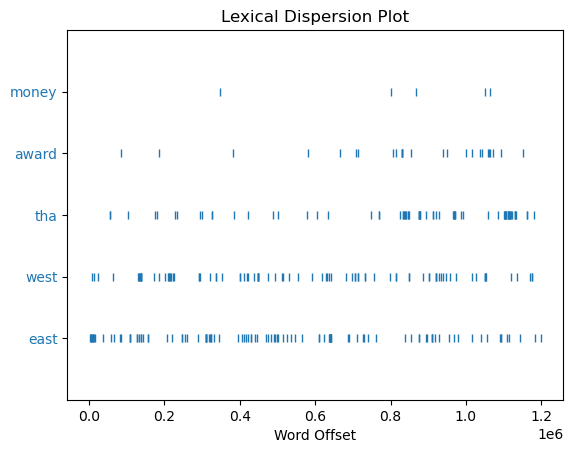

In [16]:
text.dispersion_plot(["east", "west", "tha", "award", "money"])

> **Solution**: Observations:
>    * The coasts - east and west - are well represented, with more of "east".
>    * Some articles talk about awards, but less than expected.
>    * The rapper's names seem to include the the misspelling "tha" much more than "money".

> * What is a bigram? How does it relate to `collocations`. Explain in your own words.
>    1. Compute the collocations on the rapper Wikipedia Text.

> **Solution**: Bigram is a word pair. Collocation is a sequence of words that occur together unusually often. So when trying to find collocations, bigrams are outputted.

> * Review the discussion of conditionals in Sec. 4. Find all words in the rapper Wikipedia Text starting with the letter *h*. Show the first 5 in alphabetical order. Try with a few other letters. Any fun examples of top-five words?

In [17]:
def getWordsStartingWith(words, letter, top = 5):
    h_words = list(pd.Series(sorted([word for word in words if (word.startswith(letter.lower()) or word.startswith(letter.upper())) and len(word) > 1])).unique())

    return h_words[:top]

In [18]:
getWordsStartingWith(words, 'h', top = 5)

['H1gher', 'H1ghr', 'H2O', 'HA', 'HAD']

In [19]:
getWordsStartingWith(words, 'a', top = 5)

['A2', 'A2267192', 'A2G', 'A2IM', 'A2ThaK']

In [20]:
getWordsStartingWith(words, 'y', top = 5)

['Y2K', 'Y3', 'YAMAHA', 'YAYA', 'YBN']

> * Use `.index()` to find the index of the word *Snoop*. You'll need to insert this word as an argument between the parentheses. By a process of trial and error, find the slice for the complete sentence that contains this word.

In [21]:
import re
def detectPeriod(word):
    alphanumeric_pattern = re.compile(r'[^a-zA-Z0-9\s.]')
    
    # Use the sub() method to replace non-alphanumeric characters with an empty string
    clean_word = alphanumeric_pattern.sub('', word)
    return clean_word and not clean_word.isspace() and "."*len(clean_word) == clean_word

# Find the index of the word 'Snoop'
index = words.index('Snoop')

# Find the start and end indices of the sentence containing 'Snoop'
start_index = index
while start_index > 0 and not detectPeriod(words[start_index - 1]):
    start_index -= 1
end_index = index
while end_index < len(words) - 1 and not detectPeriod(words[end_index + 1]):
    end_index += 1

# Convert the list of words in the sentence back to a string
sentence = ' '.join(words[start_index:end_index + 1])
print(sentence + ".")

Dre featuring Snoop Dogg , Kurupt , and Nate Dogg – ( produced by James Gabriel ) " Benjamins " ( featuring Rich Perez and Izz ) remix of " It ' s All About the Benjamins ( remix )" by Sean Combs featuring Lil ' Kim , The Notorious B.


> * Review the discussion of looping with conditions in Sec 4. Use a combination of `for` and `if` statements to loop over the words of the rapper Wikipedia text and print the 5 longest uppercase words, one per line.

In [22]:
maxlen = max(len(word) for word in text if word.isupper())
result = []
while True:
    result += [word for word in text if len(word) == maxlen and word.isupper()]
    maxlen-=1
    if len(result) >= 5: 
        break

result = result [:5]
print(result)

['CHRISTMAKWHANNUVUSWALIYEARS', 'SHINIGAMISTARSHIP', 'AREYOUREADYKIDS', 'MERRYPOCALYPSE', 'CHAMILLIONAIRE']


### *Exercise 2*: Basic stats

> * How many tokens are there in the rapper Wikipedia text? How many distinct tokens are there?

In [23]:
print(f"Number of tokens: {len(words)}")
print(f"Number of distinct tokens {len(set(words))}")

Number of tokens: 1200899
Number of distinct tokens 42664


> * Explain in your own words what aspect of language _lexical diversity_ describes. 
>     1. Compute the lexical diversity of the rapper Wikipedia text;
>     2. Compute the lexical diversity related to West (coast) and East (coast). Comment on your results.

In [33]:
def coastWords(coast):
    return PlaintextCorpusReader(CLEAN_DATA_DIRECTORY+f'/{coast}', '.*')

words_east = coastWords("East").words()
words_west = coastWords("West").words()

In [41]:
print(f"Lexical diversity of all rappers: {len(words)/len(set(words))}")
print(f"\tLexical diversity of West (coast) rappers: {len(words_west)/len(set(words_west))}")
print(f"\tLexical diversity of East (coast) rappers: {len(words_east)/len(set(words_east))}")

Lexical diversity of all rappers: 28.14782955184699
	Lexical diversity of West (coast) rappers: 17.5902467232074
	Lexical diversity of East (coast) rappers: 23.10509820957582


> * Create frequency distributions for the rapper Wikipedia text, including the cumulative frequency plot for the 75 most common tokens. 

In [49]:
top = 75
from nltk import FreqDist
# Create a frequency distribution
fdist = FreqDist(words)

# Get the most common words
most_common_words = fdist.most_common(3)

# Get the total number of unique words
unique_words_count = len(fdist)

# Output the results
print("Most common tokens:", most_common_words)
print("Total unique tokens:", unique_words_count)

Most common tokens: [(',', 63746), ('.', 44773), ('the', 35641)]
Total unique tokens: 42664


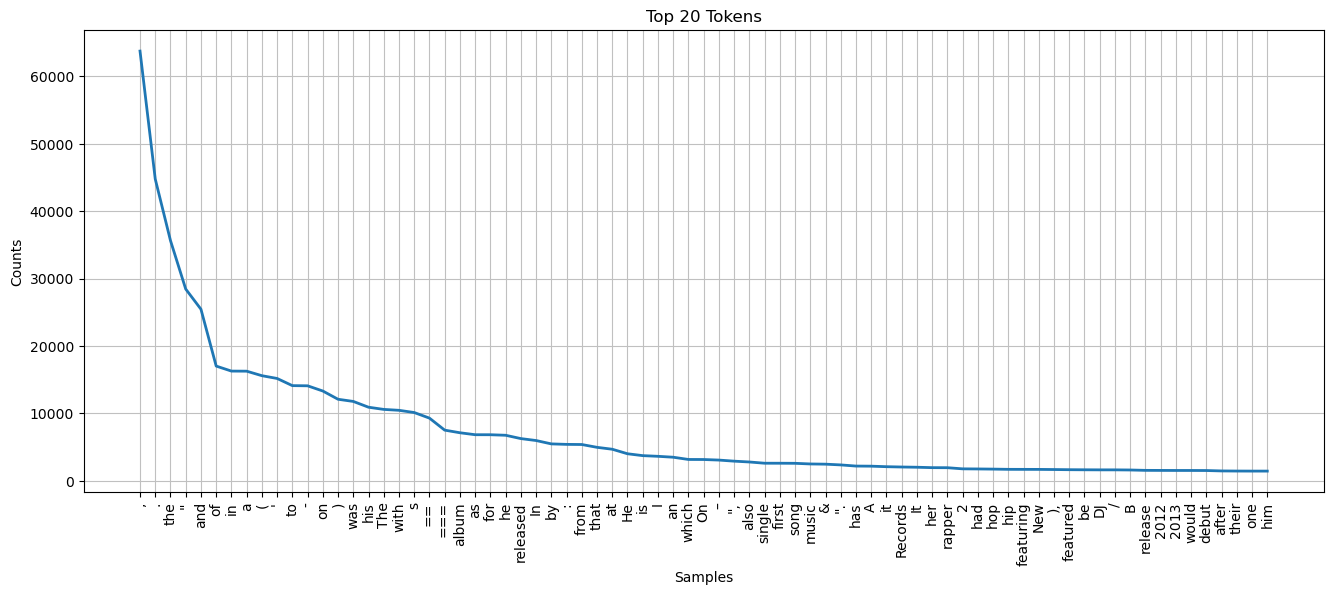

<Axes: title={'center': 'Top 20 Tokens'}, xlabel='Samples', ylabel='Counts'>

In [52]:
# Plot a frequency distribution graph (requires Matplotlib)
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
fdist.plot(top, title="Top 20 Tokens")

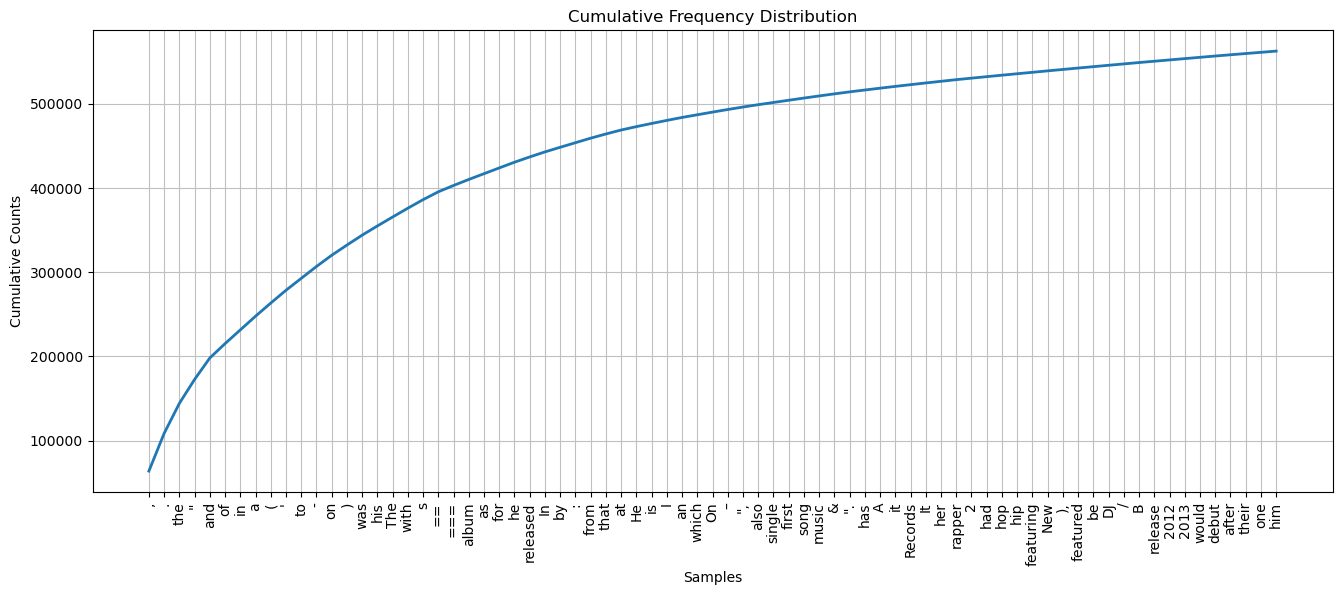

<Axes: title={'center': 'Cumulative Frequency Distribution'}, xlabel='Samples', ylabel='Cumulative Counts'>

In [53]:
# Plot a cumulative frequency distribution graph (requires Matplotlib)
plt.figure(figsize=(16,6))
fdist.plot(top, cumulative=True, title="Cumulative Frequency Distribution")

> * Find all the four-letter tokens in the rapper Wikipedia text. With the help of a frequency distribution (FreqDist), show these tokens in decreasing order of frequency.

In [54]:
from nltk import FreqDist
# Create a frequency distribution
fdist = FreqDist([el for el in words if len(el) == 4])

# Get the most common words
most_common_words = fdist.most_common(3)

# Get the total number of unique words
unique_words_count = len(fdist)

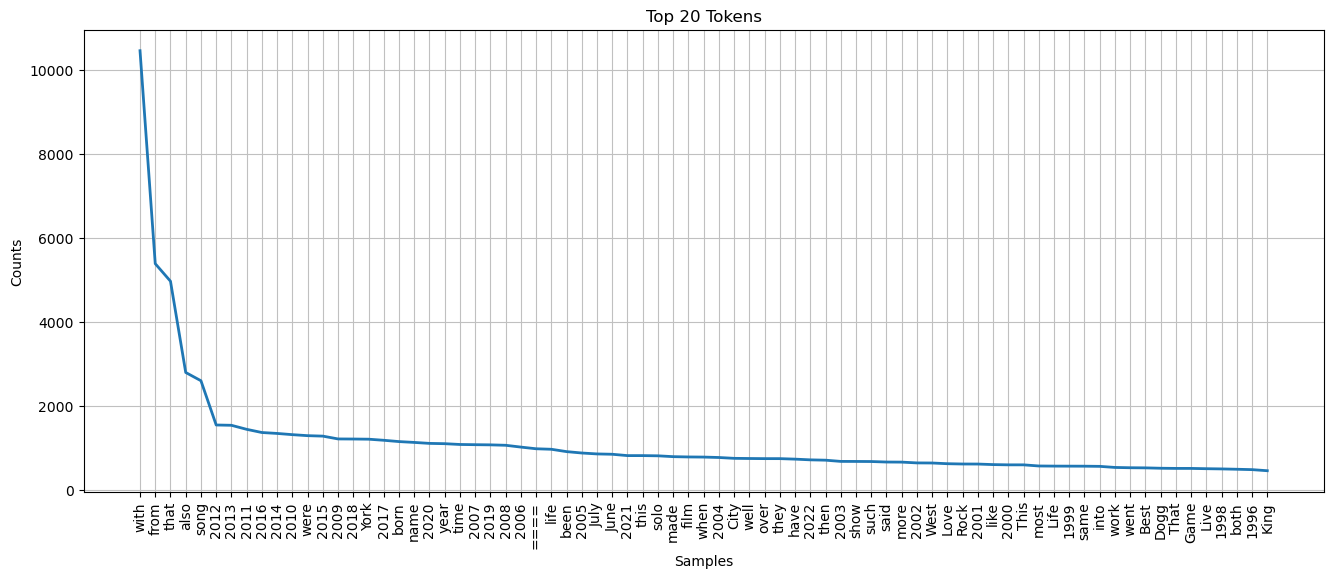

<Axes: title={'center': 'Top 20 Tokens'}, xlabel='Samples', ylabel='Counts'>

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,6))
fdist.plot(top, title="Top 20 Tokens")

> * What does the following code do? `sum(len(w) for w in rapperWiki)` Can you use it to work out the average token length of the rapper Wikipedia text?

In [57]:
print(f"Average token length: {sum(len(w) for w in words)/len(words):.2f}")

Average token length: 3.88


> * Define a function:
>     1. called `vocab_size(text)` that has a single parameter for the `text`, and which returns the vocabulary size of the text. Apply it to the rapper Wikipedia text;
>     2. `percent(word, text)` that calculates how often a given `word` occurs in a `text`, and expresses the result as a percentage. Apply it to the rapper Wikipedia Text to compute the percentage for *Dre*.

In [61]:
def vocab_size(text):
    return len(set(text))
def percent(word, text):
    return 100*sum(1 for el in text if el == word)/len(text)

print(f"vocab_size: {vocab_size(words)}")
print(f"percent for 'Dre': {percent('Dre', words):.4f}%")

vocab_size: 42664
percent for 'Dre': 0.0564%


# Part 3: Working with NLTK and other types of text

So far, we've worked with text from the rapper Wikipedia. But that's not the only source of text in the universe. In fact, it's far from it. Chapter 2 in NLPP is all about getting access to nicely curated texts that you can find built into NLTK.
> 
> Reading: NLPP Chapter 2, Sec. 1 - 4.
>

## *Exercises*: NLPP Chapter 2\. (other stuff that might be due in an assignment)

### Solve exercise 4, 8, 11, 15, 16, 17, 18 in NLPP, section 2.8\. As always, I recommend you write up your solutions nicely in a `notebook`.

#### 4. Read in the texts of the State of the Union addresses, using the state_union corpus reader. Count occurrences of men, women, and people in each document. What has happened to the usage of these words over time?

In [77]:
import matplotlib.pyplot as plt
from nltk.corpus import state_union
from nltk import FreqDist

# Create a frequency distribution
words = state_union.words()
fdist = FreqDist(words)
listofwords = ['men', 'women', 'people']
for word in listofwords:
    print(f"Occurrences of '{word}': {fdist[word]}")


Occurrences of 'men': 228
Occurrences of 'women': 141
Occurrences of 'people': 1291


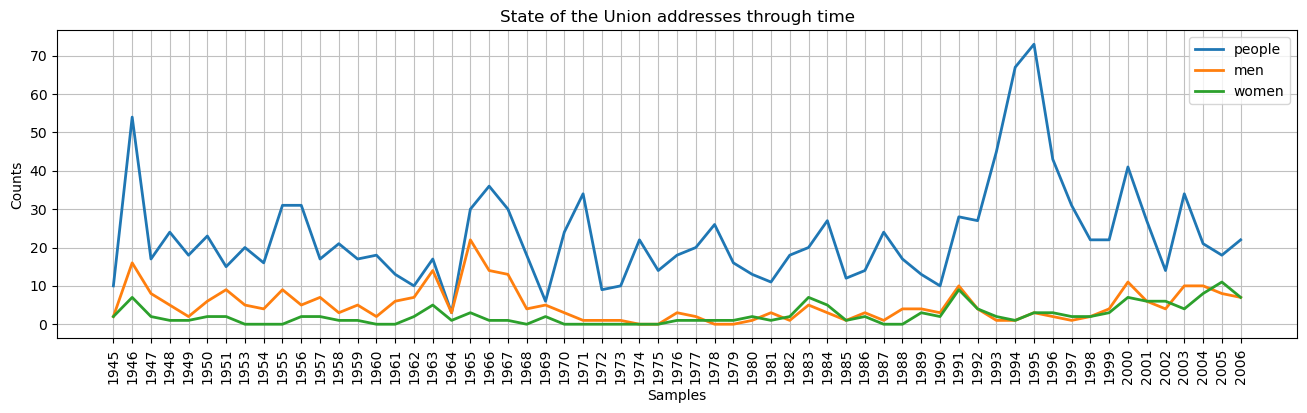

<Axes: title={'center': 'State of the Union addresses through time'}, xlabel='Samples', ylabel='Counts'>

In [87]:
cfd = nltk.ConditionalFreqDist(
            (target, fileid[:4]) # "[:4]" slices only the years of the speeches
            for fileid in state_union.fileids()
            for word in state_union.words(fileid)
            for target in listofwords
            if word.lower().startswith(target))
plt.figure(figsize=(16,4))
cfd.plot(title="State of the Union addresses through time")

#### 8. Define a conditional frequency distribution over the Names corpus that allows you to see which initial letters are more frequent for males vs. females

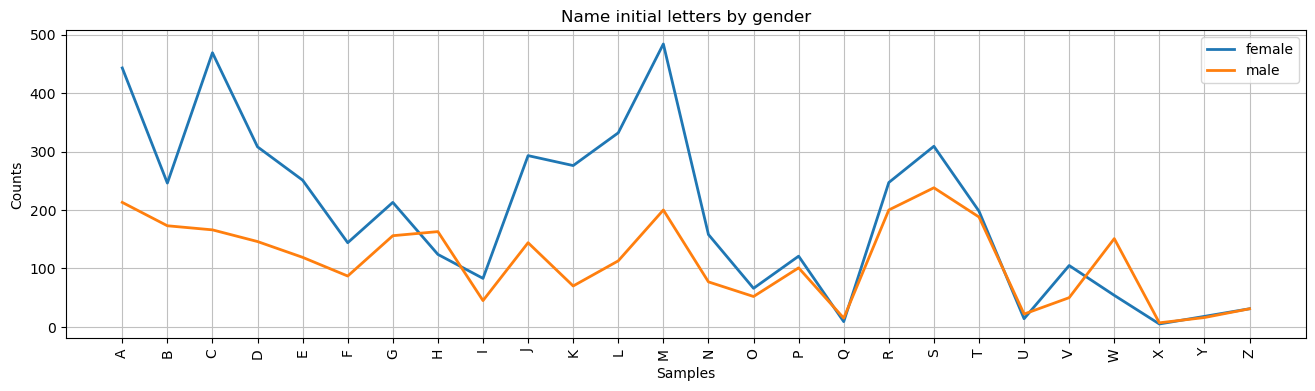

<Axes: title={'center': 'Name initial letters by gender'}, xlabel='Samples', ylabel='Counts'>

In [98]:
from nltk.corpus import names
cfd = nltk.ConditionalFreqDist(
            (fileid[:-4], word[0]) 
            for fileid in names.fileids()
            for word in names.words(fileid))
plt.figure(figsize=(16,4))
cfd.plot(title="Name initial letters by gender")

#### 11. Investigate the table of modal distributions and look for other patterns. Try to explain them in terms of your own impressionistic understanding of the different genres. Can you find other closed classes of words that exhibit significant differences across different genres?

#### 15. Write a program to find all words that occur at least three times in the Brown Corpus.

In [102]:
from nltk.corpus import brown
from nltk import FreqDist

# Create a frequency distribution
words = brown.words()
fdist = FreqDist(words)

result = [key for (key, value) in dict(fdist).items() if value >= 3]
print(result)

['The', 'Fulton', 'County', 'Grand', 'Jury', 'said', 'Friday', 'an', 'investigation', 'of', "Atlanta's", 'recent', 'primary', 'election', 'produced', '``', 'no', 'evidence', "''", 'that', 'any', 'irregularities', 'took', 'place', '.', 'jury', 'further', 'in', 'the', 'City', 'Executive', 'Committee', ',', 'which', 'had', 'over-all', 'charge', 'deserves', 'praise', 'and', 'thanks', 'Atlanta', 'for', 'manner', 'was', 'conducted', 'term', 'been', 'charged', 'by', 'Superior', 'Court', 'Judge', 'to', 'investigate', 'reports', 'possible', 'won', 'Ivan', 'Allen', 'Jr.', 'Only', 'a', 'relative', 'handful', 'such', 'received', 'considering', 'widespread', 'interest', 'number', 'voters', 'size', 'this', 'city', 'it', 'did', 'find', 'many', "Georgia's", 'registration', 'laws', 'are', 'outmoded', 'or', 'inadequate', 'often', 'ambiguous', 'It', 'recommended', 'legislators', 'act', 'have', 'these', 'studied', 'revised', 'end', 'modernizing', 'improving', 'them', 'grand', 'commented', 'on', 'other', '

#### 16. Write a program to generate a table of lexical diversity scores (i.e. token/type ratios), as we saw in 1.1. Include the full set of Brown Corpus genres (nltk.corpus.brown.categories()). Which genre has the lowest diversity (greatest number of tokens per type)? Is this what you would have expected?

In [114]:
from nltk.corpus import brown
import pandas as pd

table = pd.DataFrame(columns=["Genre", "Tokens", "Types", "Lexical diversity"])

for category in brown.categories():
    words = brown.words(categories=category)
    tokens = len(words)
    types = len(set(words))
    table.loc[len(table)] = {"Genre": category, "Tokens": tokens,
                              "Types": types, "Lexical diversity": tokens/types}
table

,Genre,Tokens,Types,Lexical diversity
0,adventure,69342,8874,7.814064
1,belles_lettres,173096,18421,9.396667
2,editorial,61604,9890,6.228918
3,fiction,68488,9302,7.362718
4,government,70117,8181,8.570713
5,hobbies,82345,11935,6.899455
6,humor,21695,5017,4.324297
7,learned,181888,16859,10.788778
8,lore,110299,14503,7.605254
9,mystery,57169,6982,8.188055


#### 17. Use text9.index() to find the index of the word sunset. You'll need to insert this word as an argument between the parentheses. By a process of trial and error, find the slice for the complete sentence that contains this word.

In [119]:
import re
from nltk.corpus import brown
def detectPeriod(word):
    alphanumeric_pattern = re.compile(r'[^a-zA-Z0-9\s.]')
    
    # Use the sub() method to replace non-alphanumeric characters with an empty string
    clean_word = alphanumeric_pattern.sub('', word)
    # print(f"{word} \t -> {clean_word}")
    return clean_word and not clean_word.isspace() and "."*len(clean_word) == clean_word

words = brown.words()
# Find the index of the word 'Snoop'
index = words.index('sunset')

# Find the start and end indices of the sentence containing 'Snoop'
start_index = index
while start_index > 0 and not detectPeriod(words[start_index - 1]):
    start_index -= 1
end_index = index
while end_index < len(words) - 1 and not detectPeriod(words[end_index + 1]):
    end_index += 1

# Convert the list of words in the sentence back to a string
sentence = ' '.join(words[start_index:end_index + 1])
print(sentence + ".")

Pictures of the Midwest Night scenes will add an exciting touch to your vacation travelogue and what better place to take them then along Chicago's Lake Shore Drive ? ? Just after sunset is a good time to record the city lights in color since you get a `` fill-in '' light from the sky.


#### 18. Using list addition, and the set and sorted operations, compute the vocabulary of the sentences sent1 ... sent8.

In [122]:
sentences = brown.sents()[:8]
# Tokenize and create a set to remove duplicates
vocabulary_set = set(word for sentence in sentences for word in sentence)

# Sort the vocabulary and convert it back to a list
vocabulary_sorted = sorted(vocabulary_set)


### Zipf's law

> * Work through exercise 2.8.23 on Zipf's law. [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law) connects to a property of the Barabasi-Albert networks. Which one? Take a look at [this article](https://www.hpl.hp.com/research/idl/papers/ranking/adamicglottometrics.pdf) and write a paragraph or two describing other important instances of power-laws found on the internet.